In [1]:
import pandas as pd
import numpy as np

from main import set_ab_test 
from main import validate_ab_test_data
from main import test_hypothesis_relational
from main import test_hypothesis_continuous
from main import print_statistical_report
from main import save_report_to_html

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
EXPERIMENT_NAME = 'ab_price_discount'

exp_df = pd.DataFrame({
    'user_id': [1, 1, 2, 3, 3, 4, 5, 6],
    'dt': ['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-02', '2021-01-05', '2021-01-01'],
    'group': [2, 1, 1, 2, 2, 2, 1, 3],
    'payment': [np.nan, 100, np.nan, 110, np.nan, 50, np.nan, 130]
})

In [4]:
exp_df.describe()

,user_id,group,payment
count,8.000000,8.000000,4.000000
mean,3.125000,1.750000,97.500000
std,1.807722,0.707107,34.034296
min,1.000000,1.000000,50.000000
25%,1.750000,1.000000,87.500000
50%,3.000000,2.000000,105.000000
75%,4.250000,2.000000,115.000000
max,6.000000,3.000000,130.000000


In [5]:
m = set_ab_test(
    ab_test_name=EXPERIMENT_NAME, 
    dataframe=exp_df, 
    group_col='group', 
    date_col='dt', 
    uniq_id_col='user_id',
    control_group_name=1
)

In [6]:
validate_ab_test_data(EXPERIMENT_NAME)

group                   1           2      3
user_id count    3.000000    4.000000    1.0
        mean     2.666667    2.750000    6.0
        std      2.081666    1.258306    NaN
        min      1.000000    1.000000    6.0
        25%      1.500000    2.500000    6.0
        50%      2.000000    3.000000    6.0
        75%      3.500000    3.250000    6.0
        max      5.000000    4.000000    6.0
payment count    3.000000    4.000000    1.0
        mean    33.333333   40.000000  130.0
        std     57.735027   52.281290    NaN
        min      0.000000    0.000000  130.0
        25%      0.000000    0.000000  130.0
        50%      0.000000   25.000000  130.0
        75%     50.000000   65.000000  130.0
        max    100.000000  110.000000  130.0

,group,user_id
0,1,5
1,2,1


'test_hypothesis_relational'

,group,dt,payment,user_id,metric
0,1,2021-01-01,0.0,2,0.000000
1,1,2021-01-02,100.0,1,100.000000
2,1,2021-01-05,0.0,5,0.000000
3,2,2021-01-01,0.0,1,0.000000
4,2,2021-01-02,160.0,7,22.857143
5,2,2021-01-03,0.0,3,0.000000
6,3,2021-01-01,130.0,6,21.666667


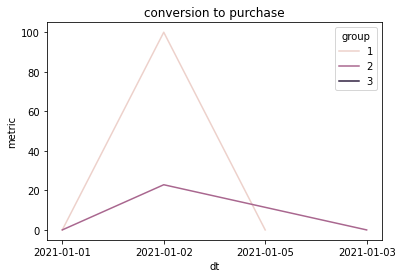

In [7]:
test_hypothesis_relational(
    EXPERIMENT_NAME,
    nominator='payment',
    denominator='user_id',
    stat_test='chisquare', # ztest
    description='conversion to purchase',
    uniq_id_rel=False,
    significance_level=0.05
)

'test_hypothesis_continuous'

,group,dt,metric
0,1,2021-01-01,0.0
1,1,2021-01-02,100.0
2,1,2021-01-05,0.0
3,2,2021-01-01,0.0
4,2,2021-01-02,80.0
5,2,2021-01-03,0.0
6,3,2021-01-01,130.0


'not enough data to test "ARPU (USD after fee)   payment" hypothesis in groups 1-3'

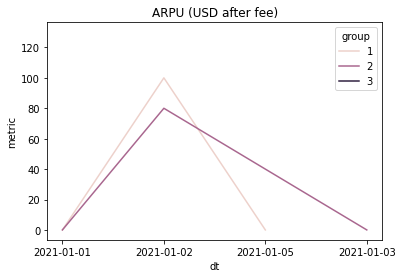

In [8]:
test_hypothesis_continuous(
    EXPERIMENT_NAME,
    value='payment',
    stat_test='ttest_welsh',
    description='ARPU (USD after fee)'
)

In [9]:
print_statistical_report(EXPERIMENT_NAME)

'print_statistical_report'

,1,2,3,group 1-2 sign.,group 1-3 sign.
metrics,,,,,
conversion to purchase,12.500,14.545 (+16.36%),21.667 (+73.33%),- (H0 accepted),- (H0 accepted)
ARPU (USD after fee),33.333,40.0 (+20.00%),NaN,- (H0 accepted),NaN


In [10]:
save_report_to_html(EXPERIMENT_NAME)

'save_report_to_html'